# Practicing using some python libs with financial data.


In [ ]:
%pip install numpy
%pip install pandas
%pip install requests
%pip install xlsxwriter
%pip install yfinance
%pip install matplotlib

In [11]:
import numpy as np
import pandas as pd
import requests
import xlsxwriter
import math
import yfinance as yf
import matplotlib.pyplot as plt

In [15]:
ticker = ["SPY", "AAPL", "KO"]

In [16]:
stocks = yf.download(ticker, start = "2010-01-01", end = "2023-01-01")

[*********************100%%**********************]  3 of 3 completed


In [24]:
stocks

,Unnamed: 0,Adj Close,Adj Close.1,Adj Close.2,Close,Close.1,Close.2,High,High.1,High.2,Low,Low.1,Low.2,Open,Open.1,Open.2,Volume,Volume.1,Volume.2
0,NaN,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY,AAPL,KO,SPY
1,Date,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2010-01-04,6.487532138824463,18.79323959350586,87.79177856445312,7.643214225769043,28.520000457763672,113.33000183105469,7.660714149475098,28.610000610351562,113.38999938964844,7.585000038146973,28.450000762939453,111.51000213623047,7.622499942779541,28.579999923706055,112.37000274658203,493729600,13870400,118944600
3,2010-01-05,6.498749732971191,18.565906524658203,88.0241928100586,7.656428813934326,28.174999237060547,113.62999725341797,7.699643135070801,28.4950008392334,113.68000030517578,7.6160712242126465,28.06999969482422,112.8499984741211,7.664286136627197,28.424999237060547,113.26000213623047,601904800,23172400,111579900
4,2010-01-06,6.395379543304443,18.559310913085938,88.08616638183594,7.534643173217773,28.165000915527344,113.70999908447266,7.68678617477417,28.219999313354492,113.98999786376953,7.526785850524902,27.989999771118164,113.43000030517578,7.656428813934326,28.174999237060547,113.5199966430664,552160000,19264600,116074400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3269,2022-12-23,131.29981994628906,62.85549545288086,380.04248046875,131.86000061035156,63.81999969482422,382.9100036621094,132.4199981689453,63.869998931884766,383.05999755859375,129.63999938964844,63.20000076293945,378.0299987792969,130.9199981689453,63.5,379.6499938964844,63814900,6463300,59857300
3270,2022-12-27,129.4775848388672,63.23959732055664,378.5437927246094,130.02999877929688,64.20999908447266,381.3999938964844,131.41000366210938,64.29000091552734,383.1499938964844,128.72000122070312,63.709999084472656,379.6499938964844,131.3800048828125,63.93000030517578,382.7900085449219,69007800,7320700,51638200
3271,2022-12-28,125.5045394897461,62.60927200317383,373.8392639160156,126.04000091552734,63.56999969482422,376.6600036621094,131.02999877929688,64.6500015258789,383.3900146484375,125.87000274658203,63.4900016784668,376.4200134277344,129.6699981689453,64.45999908447266,381.3299865722656,85438400,7159400,70911500
3272,2022-12-29,129.0593719482422,62.98352813720703,380.5685119628906,129.61000061035156,63.95000076293945,383.44000244140625,130.47999572753906,64.1500015258789,384.3500061035156,127.7300033569336,63.70000076293945,379.0799865722656,127.98999786376953,63.79999923706055,379.6300048828125,75703700,7169300,66970900


In [27]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col = 0, parse_dates = [0])
stocks

Adj Close                              Close             \
                  AAPL         KO         SPY        AAPL         KO   
Date                                                                   
2010-01-04    6.487532  18.793240   87.791779    7.643214  28.520000   
2010-01-05    6.498750  18.565907   88.024193    7.656429  28.174999   
2010-01-06    6.395380  18.559311   88.086166    7.534643  28.165001   
2010-01-07    6.383555  18.513182   88.457985    7.520714  28.094999   
2010-01-08    6.425995  18.170527   88.752373    7.570714  27.575001   
...                ...        ...         ...         ...        ...   
2022-12-23  131.299820  62.855495  380.042480  131.860001  63.820000   
2022-12-27  129.477585  63.239597  378.543793  130.029999  64.209999   
2022-12-28  125.504539  62.609272  373.839264  126.040001  63.570000   
2022-12-29  129.059372  62.983528  380.568512  129.610001  63.950001   
2022-12-30  129.378006  62.648670  379.566040  129.929993  63.610001   

                              High                                Low  \
                   SPY        AAPL         KO         SPY        AAPL   
Date                                                                    
2010-01-04  113.330002    7.660714  28.610001  113.389999    7.585000   
2010-01-05  113.629997    7.699643  28.495001  113.680000    7.616071   
2010-01-06  113.709999    7.686786  28.219999  113.989998    7.526786   
2010-01-07  114.190002    7.571429  28.184999  114.330002    7.466071   
2010-01-08  114.570000    7.571429  27.820000  114.620003    7.466429   
...                ...         ...        ...         ...         ...   
2022-12-23  382.910004  132.419998  63.869999  383.059998  129.639999   
2022-12-27  381.399994  131.410004  64.290001  383.149994  128.720001   
2022-12-28  376.660004  131.029999  64.650002  383.390015  125.870003   
2022-12-29  383.440002  130.479996  64.150002  384.350006  127.730003   
2022-12-30  382.429993  129.949997  63.919998  382.579987  127.430000   

                                         Open                         \
                   KO         SPY        AAPL         KO         SPY   
Date                                                                   
2010-01-04  28.450001  111.510002    7.622500  28.580000  112.370003   
2010-01-05  28.070000  112.849998    7.664286  28.424999  113.260002   
2010-01-06  27.990000  113.430000    7.656429  28.174999  113.519997   
2010-01-07  27.875000  113.180000    7.562500  28.165001  113.500000   
2010-01-08  27.375000  113.660004    7.510714  27.730000  113.889999   
...               ...         ...         ...        ...         ...   
2022-12-23  63.200001  378.029999  130.919998  63.500000  379.649994   
2022-12-27  63.709999  379.649994  131.380005  63.930000  382.790009   
2022-12-28  63.490002  376.420013  129.669998  64.459999  381.329987   
2022-12-29  63.700001  379.079987  127.989998  63.799999  379.630005   
2022-12-30  63.169998  378.429993  128.410004  63.919998  380.640015   

               Volume                       
                 AAPL        KO        SPY  
Date                                        
2010-01-04  493729600  13870400  118944600  
2010-01-05  601904800  23172400  111579900  
2010-01-06  552160000  19264600  116074400  
2010-01-07  477131200  13234600  131091100  
2010-01-08  447610800  28712400  126402800  
...               ...       ...        ...  
2022-12-23   63814900   6463300   59857300  
2022-12-27   69007800   7320700   51638200  
2022-12-28   85438400   7159400   70911500  
2022-12-29   75703700   7169300   66970900  
2022-12-30   77034200   7650200   84022200  

[3272 rows x 18 columns]

In [31]:
#convert mult index to one tuple
stocks.columns = stocks.columns.to_flat_index()

In [32]:
stocks.columns

Index([('Adj Close', 'AAPL'),   ('Adj Close', 'KO'),  ('Adj Close', 'SPY'),
           ('Close', 'AAPL'),       ('Close', 'KO'),      ('Close', 'SPY'),
            ('High', 'AAPL'),        ('High', 'KO'),       ('High', 'SPY'),
             ('Low', 'AAPL'),         ('Low', 'KO'),        ('Low', 'SPY'),
            ('Open', 'AAPL'),        ('Open', 'KO'),       ('Open', 'SPY'),
          ('Volume', 'AAPL'),      ('Volume', 'KO'),     ('Volume', 'SPY')],
      dtype='object')

In [33]:
stocks

,"(Adj Close, AAPL)","(Adj Close, KO)","(Adj Close, SPY)","(Close, AAPL)","(Close, KO)","(Close, SPY)","(High, AAPL)","(High, KO)","(High, SPY)","(Low, AAPL)","(Low, KO)","(Low, SPY)","(Open, AAPL)","(Open, KO)","(Open, SPY)","(Volume, AAPL)","(Volume, KO)","(Volume, SPY)"
Date,,,,,,,,,,,,,,,,,,
2010-01-04,6.487532,18.793240,87.791779,7.643214,28.520000,113.330002,7.660714,28.610001,113.389999,7.585000,28.450001,111.510002,7.622500,28.580000,112.370003,493729600,13870400,118944600
2010-01-05,6.498750,18.565907,88.024193,7.656429,28.174999,113.629997,7.699643,28.495001,113.680000,7.616071,28.070000,112.849998,7.664286,28.424999,113.260002,601904800,23172400,111579900
2010-01-06,6.395380,18.559311,88.086166,7.534643,28.165001,113.709999,7.686786,28.219999,113.989998,7.526786,27.990000,113.430000,7.656429,28.174999,113.519997,552160000,19264600,116074400
2010-01-07,6.383555,18.513182,88.457985,7.520714,28.094999,114.190002,7.571429,28.184999,114.330002,7.466071,27.875000,113.180000,7.562500,28.165001,113.500000,477131200,13234600,131091100
2010-01-08,6.425995,18.170527,88.752373,7.570714,27.575001,114.570000,7.571429,27.820000,114.620003,7.466429,27.375000,113.660004,7.510714,27.730000,113.889999,447610800,28712400,126402800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-23,131.299820,62.855495,380.042480,131.860001,63.820000,382.910004,132.419998,63.869999,383.059998,129.639999,63.200001,378.029999,130.919998,63.500000,379.649994,63814900,6463300,59857300
2022-12-27,129.477585,63.239597,378.543793,130.029999,64.209999,381.399994,131.410004,64.290001,383.149994,128.720001,63.709999,379.649994,131.380005,63.930000,382.790009,69007800,7320700,51638200
2022-12-28,125.504539,62.609272,373.839264,126.040001,63.570000,376.660004,131.029999,64.650002,383.390015,125.870003,63.490002,376.420013,129.669998,64.459999,381.329987,85438400,7159400,70911500


In [37]:
stocks.describe()

Adj Close                                  Close               \
              AAPL           KO          SPY         AAPL           KO   
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean     49.259557    36.195943   217.880214    51.321186    43.864995   
std      47.620808    11.358195   104.089537    47.357062     8.837265   
min       5.821834    16.635139    79.874100     6.858929    25.014999   
25%      16.555678    28.006490   129.203835    18.967589    38.520000   
50%      27.270029    34.114914   185.754890    29.815000    42.730000   
75%      54.720006    43.468529   274.330421    56.777499    48.882499   
max     180.190964    63.820389   466.563324   182.009995    66.209999   

                           High                                    Low  \
               SPY         AAPL           KO          SPY         AAPL   
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean    239.951657    51.869747    44.153762   241.249994    50.731996   
std      98.496748    47.938843     8.917754    99.147238    46.732224   
min     102.199997     7.000000    25.150000   103.419998     6.794643   
25%     156.139999    19.121697    38.754999   156.484997    18.780179   
50%     212.509995    29.981250    43.065001   212.985001    29.561250   
75%     293.064995    57.309999    49.310001   294.164993    56.469999   
max     477.709991   182.940002    67.199997   479.980011   179.119995   

                                        Open                            \
                KO          SPY         AAPL           KO          SPY   
count  3272.000000  3272.000000  3272.000000  3272.000000  3272.000000   
mean     43.561964   238.462317    51.297746    43.860524   239.923478   
std       8.754691    97.785640    47.328490     8.836552    98.509133   
min      24.735001   101.129997     6.870357    25.110001   103.110001   
25%      38.279999   155.252495    18.966697    38.560001   156.069996   
50%      42.440001   211.635002    29.756250    42.730000   212.349998   
75%      48.529999   291.345009    56.983748    48.784999   292.877502   
max      65.720001   476.059998   182.630005    67.000000   479.220001   

             Volume                              
               AAPL            KO           SPY  
count  3.272000e+03  3.272000e+03  3.272000e+03  
mean   2.562707e+08  1.516091e+07  1.182773e+08  
std    2.225648e+08  6.725716e+06  7.140215e+07  
min    3.519590e+07  2.996300e+06  2.027000e+07  
25%    1.023541e+08  1.084798e+07  6.995998e+07  
50%    1.666698e+08  1.365555e+07  9.882665e+07  
75%    3.456643e+08  1.762438e+07  1.451754e+08  
max    1.880998e+09  9.896750e+07  7.178287e+08

In [39]:
close = stocks.loc[:, "Close"].copy()
close

,AAPL,KO,SPY
Date,,,
2010-01-04,7.643214,28.520000,113.330002
2010-01-05,7.656429,28.174999,113.629997
2010-01-06,7.534643,28.165001,113.709999
2010-01-07,7.520714,28.094999,114.190002
2010-01-08,7.570714,27.575001,114.570000
...,...,...,...
2022-12-23,131.860001,63.820000,382.910004
2022-12-27,130.029999,64.209999,381.399994
2022-12-28,126.040001,63.570000,376.660004


In [40]:
%matplotlib inline
plt.style.use("seaborn")

C:\Users\robva\AppData\Local\Temp\ipykernel_14732\673233146.py:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


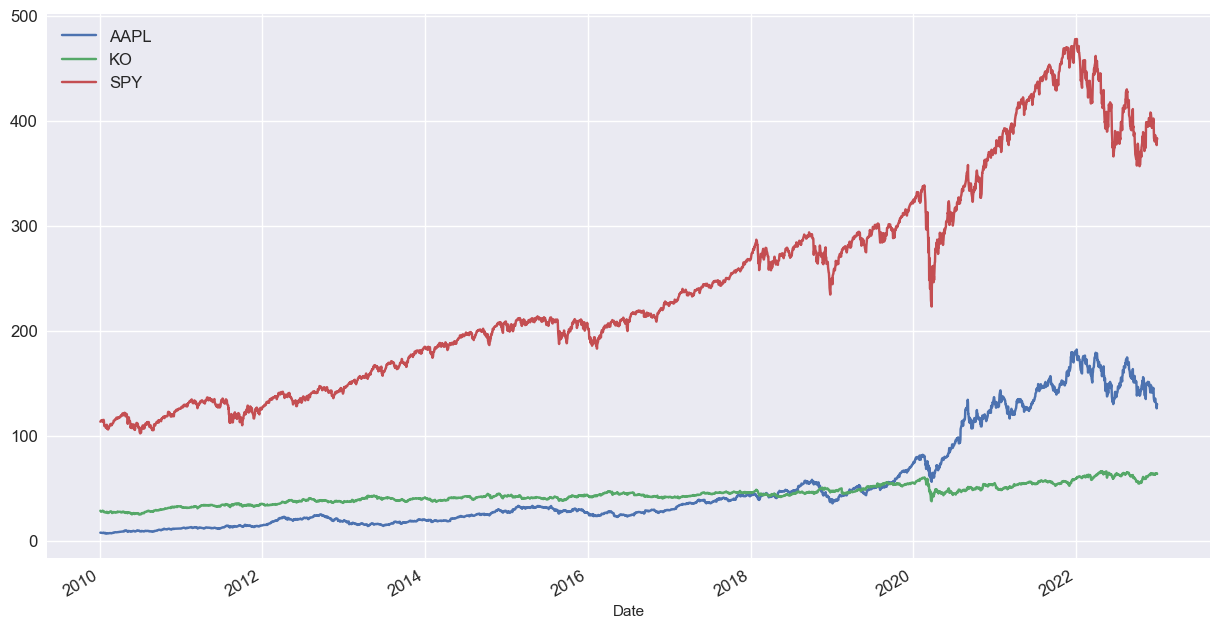

In [42]:
close.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [47]:
normclose =close.div(close.iloc[0]).mul(100)

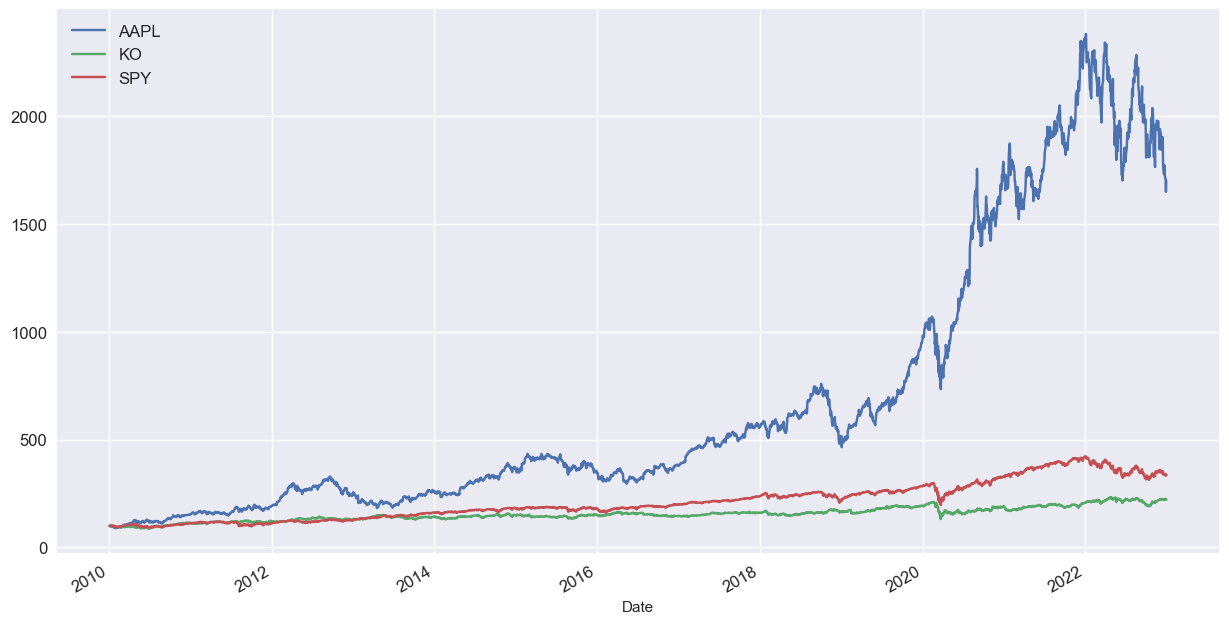

In [48]:
normclose.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [53]:
#finding the % change in AAPL between start and end
aapl = close.AAPL.copy().to_frame()
aapl["lag1"] = aapl.shift(periods=1)
aapl["diff"] = aapl.AAPL.diff(periods=1)
aapl["% change"] = aapl.AAPL.pct_change(periods=1).mul(100)
aapl

,AAPL,lag1,diff,% change
Date,,,,
2010-01-04,7.643214,NaN,NaN,NaN
2010-01-05,7.656429,7.643214,0.013215,0.172893
2010-01-06,7.534643,7.656429,-0.121786,-1.590632
2010-01-07,7.520714,7.534643,-0.013929,-0.184871
2010-01-08,7.570714,7.520714,0.050000,0.664833
...,...,...,...,...
2022-12-23,131.860001,132.229996,-0.369995,-0.279812
2022-12-27,130.029999,131.860001,-1.830002,-1.387837
2022-12-28,126.040001,130.029999,-3.989998,-3.068521


In [55]:
# resample to monthly frequency of last business day.
aapl.AAPL.resample("BM").last().pct_change(periods=1).mul(100)

Date
2010-01-29          NaN
2010-02-26     6.539620
2010-03-31    14.847028
2010-04-30    11.102138
2010-05-31    -1.612472
                ...    
2022-08-31    -3.255180
2022-09-30   -12.097700
2022-10-31    10.955137
2022-11-30    -3.462891
2022-12-30   -12.227255
Freq: BM, Name: AAPL, Length: 156, dtype: float64

In [57]:
del aapl["% change"]
del aapl["diff"]
del aapl["lag1"]

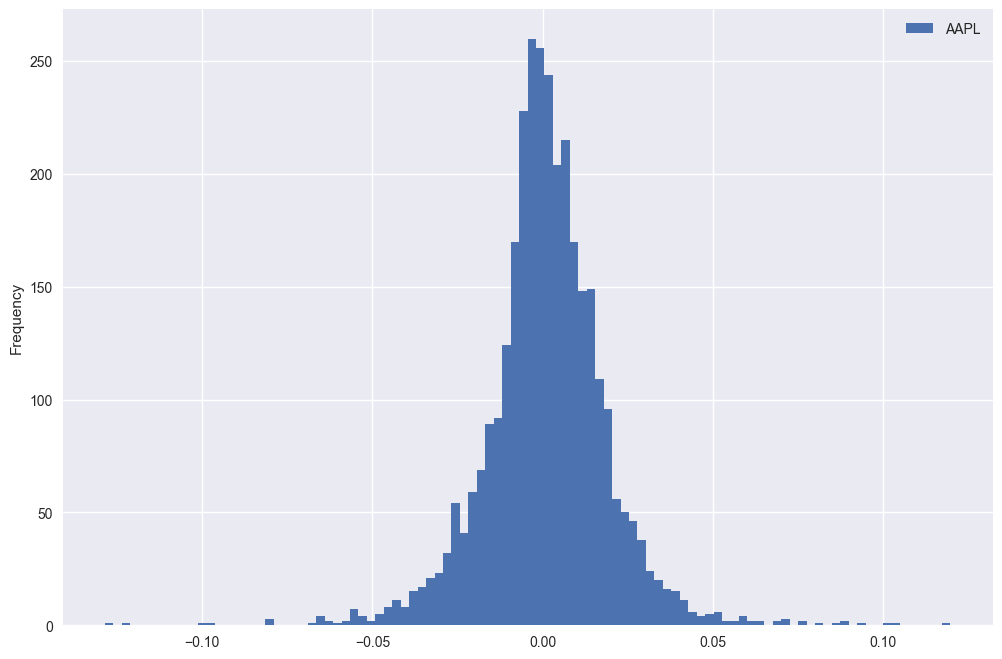

In [62]:
#calculating returns on a daily basis with histogram
ret = aapl.pct_change().dropna()
aapl
ret.plot(kind="hist", figsize=(12,8), bins=100)
plt.show()

In [63]:
daily_mean_ret=ret.mean()
var_daily = ret.var()
std_daily=ret.std()
daily_mean_ret, var_daily, std_daily

(AAPL    0.00103
 dtype: float64,
 AAPL    0.000328
 dtype: float64,
 AAPL    0.018099
 dtype: float64)

In [66]:
#252 working days in a year
annual_mean_ret = daily_mean_ret*252
annual_var_ret = var_daily*252
annual_std_ret = ret.std()*np.sqrt(252)
annual_mean_ret, annual_var_ret, annual_std_ret

(AAPL    0.259663
 dtype: float64,
 AAPL    0.082551
 dtype: float64,
 AAPL    0.287317
 dtype: float64)

In [74]:
ticker=["SPY", "AAPL", "KO", "IBM", "DIS", "MSFT"]

In [75]:
stocks = yf.download(ticker, start = "2010-01-01", end = "2023-01-01")

[*********************100%%**********************]  6 of 6 completed


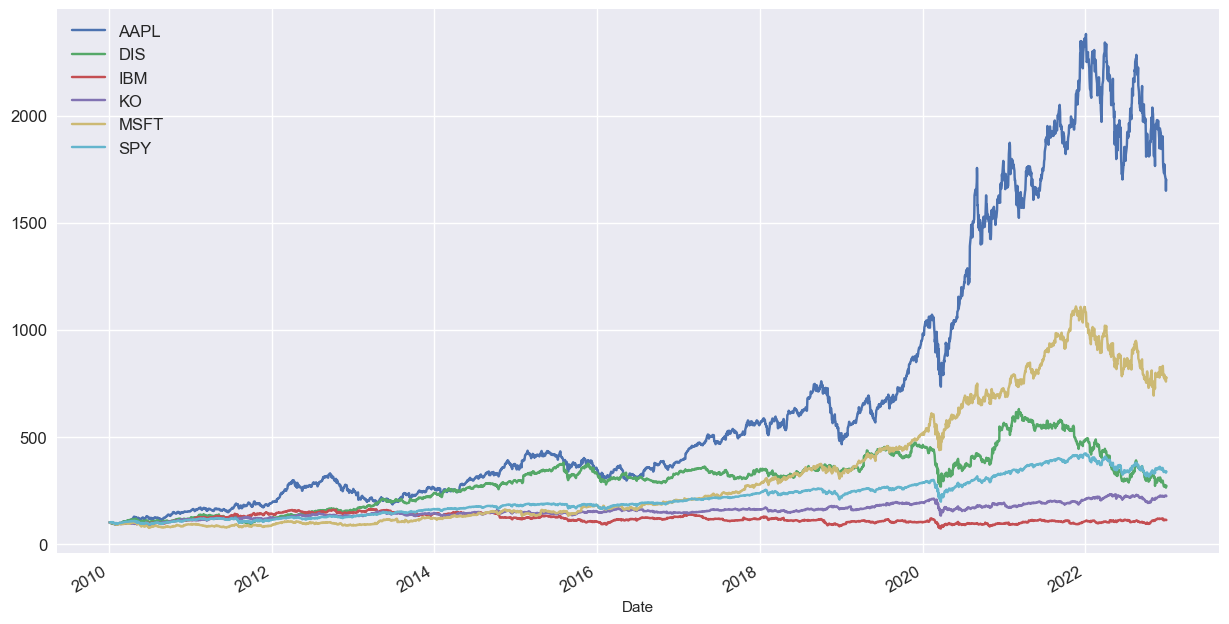

In [76]:
close = stocks.loc[:, "Close"].copy()
normclose =close.div(close.iloc[0]).mul(100)
normclose.plot(figsize=(15,8),fontsize=12)
plt.legend(fontsize=12)
plt.show()

In [77]:
ret = close.pct_change().dropna()
summary = ret.describe().T.loc[:,["mean", "std"]]
summary

,mean,std
AAPL,0.001030,0.018099
DIS,0.000440,0.016435
IBM,0.000135,0.014255
KO,0.000307,0.011097
MSFT,0.000760,0.016392
SPY,0.000434,0.011132


In [80]:
#Doing this to compare the risk reward of the following stock
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"]*np.sqrt(252)
summary

,mean,std
AAPL,16489.617634,72.403968
DIS,7035.296281,65.747393
IBM,2157.131822,57.026277
KO,4914.859756,44.390252
MSFT,12170.237961,65.573974
SPY,6946.887932,44.533261
